<a href="https://colab.research.google.com/github/DariaBukharina/HWstatprac/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [ ]:
import numpy as np
from scipy.stats import chi2

def serial_test(samples, series_length=2, num_bins=10):
    """
    Проводит последовательный тест на выборке `samples`.

    Параметры:
    - samples: list или np.array, выборка данных.
    - series_length: int, длина последовательностей (по умолчанию 2).
    - num_bins: int, количество интервалов для разбиения пространства (по умолчанию 10).

    Возвращает:
    - chi2_stat: float, статистика хи-квадрат.
    - p_value: float, p-значение теста.
    - observed: np.array, наблюдаемые частоты.
    - expected: np.array, ожидаемые частоты.
    """
    # Проверка, что длина выборки кратна длине последовательности
    if len(samples) % series_length != 0:
        raise ValueError("Длина выборки должна быть кратна длине последовательности.")

    # Разбиваем выборку на последовательности длины `series_length`
    sequences = np.array(samples).reshape(-1, series_length)

    # Создаем гистограмму для разбиения пространства на `num_bins` интервалов
    bins = np.linspace(0, 1, num_bins + 1)
    observed, _ = np.histogramdd(sequences, bins=[bins] * series_length)

    # Ожидаемые частоты (равномерное распределение)
    expected = np.ones_like(observed) * (len(sequences) / (num_bins ** series_length))

    # Вычисляем статистику хи-квадрат
    chi2_stat = np.sum((observed - expected) ** 2 / expected)

    # Вычисляем p-значение
    degrees_of_freedom = (num_bins ** series_length) - 1
    p_value = 1 - chi2.cdf(chi2_stat, degrees_of_freedom)

    return chi2_stat, p_value, observed, expected

# Пример использования
if __name__ == "__main__":
    # Генерируем случайную выборку (например, равномерное распределение)
    np.random.seed(42)
    samples = np.random.uniform(0, 1, 10000)

    # Применяем последовательный тест для последовательностей длины 2
    chi2_stat, p_value, observed, expected = serial_test(samples, series_length=2)

    # Выводим результаты
    print(f"Статистика хи-квадрат: {chi2_stat}")
    print(f"P-значение: {p_value}")
    print("Наблюдаемые частоты:")
    print(observed)
    print("Ожидаемые частоты:")
    print(expected)

Статистика хи-квадрат: 85.44000000000001
P-значение: 0.8323741139033963
Наблюдаемые частоты:
[[48. 48. 51. 50. 59. 48. 52. 34. 51. 59.]
 [49. 47. 35. 57. 50. 55. 57. 52. 61. 60.]
 [69. 53. 57. 56. 53. 54. 40. 42. 55. 45.]
 [56. 53. 45. 49. 47. 56. 54. 46. 57. 43.]
 [45. 43. 44. 53. 53. 57. 50. 53. 48. 50.]
 [58. 44. 41. 50. 53. 57. 49. 48. 55. 48.]
 [60. 49. 62. 49. 54. 48. 51. 48. 59. 38.]
 [51. 55. 49. 46. 47. 49. 47. 41. 51. 36.]
 [41. 38. 49. 38. 53. 57. 37. 53. 51. 49.]
 [54. 59. 53. 51. 53. 48. 50. 36. 47. 41.]]
Ожидаемые частоты:
[[50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]]


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import kstest, chi2_contingency, norm

# Реализация плохого генератора
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

# Реализация хорошего генератора (например, встроенного в numpy)
def rng_good():
    return np.random.rand()

# Генерация последовательностей
random_bad = [rng_bad() for _ in range(30000)]
random_good = [rng_good() for _ in range(30000)]

# Статистические тесты
def perform_statistical_tests(samples, test_type='ks'):
    if test_type == 'ks':
        # Тест Колмогорова-Смирнова
        statistic, p_value = kstest(samples, 'uniform')
        print(f"Kolmogorov-Smirnov Test: Statistic={statistic}, p-value={p_value}")
    elif test_type == 'chi2':
        # Тест хи-квадрат
        observed, _ = np.histogram(samples, bins=10, range=(0, 1))
        expected = len(samples) / 10
        chi2, p, _, _ = chi2_contingency([observed, [expected] * 10])
        print(f"Chi-squared Test: Chi-squared={chi2}, p-value={p}")
    elif test_type == 'normality':
        # Проверка на нормальность (для демонстрации)
        statistic, p_value = kstest(samples, 'norm')
        print(f"Normality Test: Statistic={statistic}, p-value={p_value}")

# Применение статистических тестов к обоим генераторам
print("Плохой генератор:")
perform_statistical_tests(random_bad, 'ks')
perform_statistical_tests(random_bad, 'chi2')

print("\nХороший генератор:")
perform_statistical_tests(random_good, 'ks')
perform_statistical_tests(random_good, 'chi2')

# Функция для создания интерактивного 3D-графика
def plot_3d_scatter(samples, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=samples[:-2],
        y=samples[1:-1],
        z=samples[2:],
        mode='markers',
        marker=dict(
            size=2,
            opacity=0.1,
            color='blue'
        )
    )])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        width=800,
        margin=dict(r=20, b=10, l=10, t=40)
    )

    fig.show()

# Визуализация для плохого генератора
plot_3d_scatter(random_bad, "Плохой генератор")

# Визуализация для хорошего генератора
plot_3d_scatter(random_good, "Хороший генератор")

Плохой генератор:
Kolmogorov-Smirnov Test: Statistic=0.008437018050998446, p-value=0.027777953265237354
Chi-squared Test: Chi-squared=8.924411515031538, p-value=0.4442807848763398

Хороший генератор:
Kolmogorov-Smirnov Test: Statistic=0.0034973742277483455, p-value=0.8552590910020487
Chi-squared Test: Chi-squared=7.751470344044373, p-value=0.5593731275478933


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

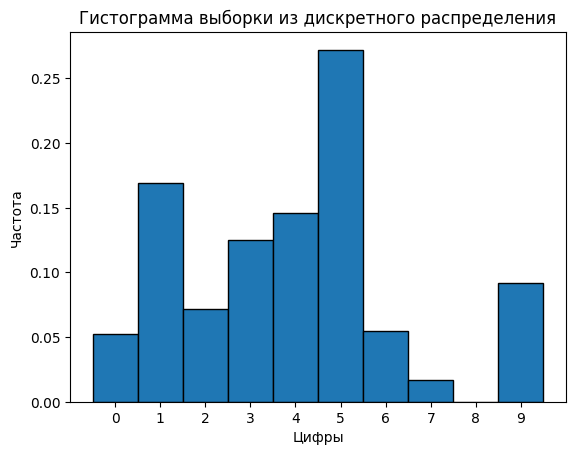

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные веса для цифр 0, 1, 2, ..., 9
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

# Нормализация весов (сумма должна быть равна 1)
weights /= weights.sum()

# Упорядочивание весов и соответствующих цифр по убыванию
sorted_indices = np.argsort(weights)[::-1]
sorted_weights = weights[sorted_indices]
sorted_digits = np.arange(10)[sorted_indices]

# Создание кумулятивных вероятностей для упорядоченных весов
cumulative_weights = np.cumsum(sorted_weights)

# Функция для генерации выборки из дискретного распределения
def generate_sample(size):
    # Генерация случайных чисел из равномерного распределения [0, 1]
    random_numbers = np.random.rand(size)

    # Выбор элементов на основе кумулятивных вероятностей
    sample_indices = np.searchsorted(cumulative_weights, random_numbers)
    sample = sorted_digits[sample_indices]

    return sample

# Генерация выборки из 1000 элементов
sample = generate_sample(1000)

# Построение гистограммы
plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black', density=True)
plt.xticks(range(10))
plt.xlabel('Цифры')
plt.ylabel('Частота')
plt.title('Гистограмма выборки из дискретного распределения')
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

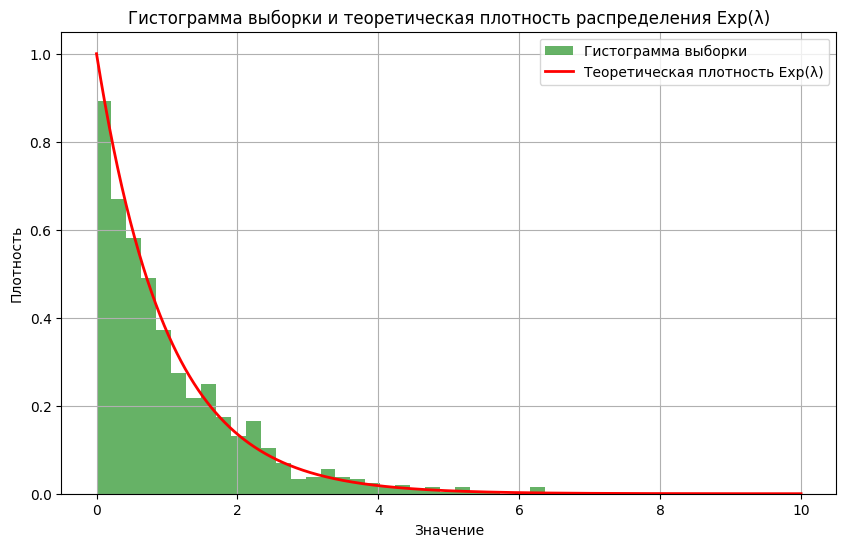

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Параметры распределения
lambda_ = 1.0  # Параметр λ для экспоненциального распределения
sample_size = 1000  # Размер выборки

# Шаг 1: Генерация равномерно распределенных случайных чисел
uniform_sample = np.random.uniform(0, 1, sample_size)

# Шаг 2: Применение обратной функции для получения экспоненциально распределенной выборки
exp_sample = -np.log(1 - uniform_sample) / lambda_

# Шаг 3: Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(exp_sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Шаг 4: Построение теоретической плотности распределения
x = np.linspace(0, 10, 1000)
pdf = expon.pdf(x, scale=1/lambda_)  # Плотность распределения Exp(λ)
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая плотность Exp(λ)')

# Настройка графика
plt.title('Гистограмма выборки и теоретическая плотность распределения Exp(λ)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

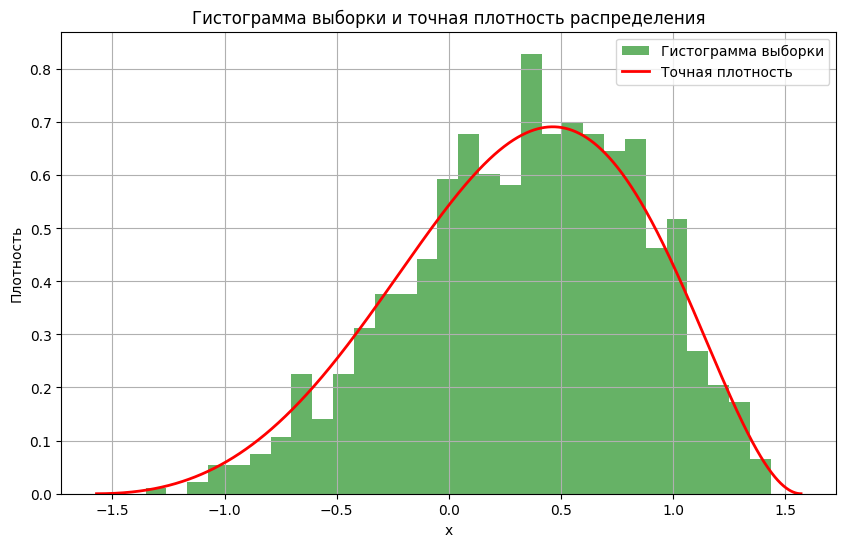

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции плотности
def target_density(x):
    return np.exp(x) * np.cos(x) ** 2

# Параметры
sample_size = 1000  # Размер выборки
a = -np.pi / 2  # Нижняя граница интервала
b = np.pi / 2  # Верхняя граница интервала

# Шаг 1: Нахождение константы M
x = np.linspace(a, b, 1000)
M = np.max(target_density(x)) * (b - a)  # Учитываем равномерное распределение

# Шаг 2: Генерация выборки методом отклонения
samples = []
while len(samples) < sample_size:
    x = np.random.uniform(a, b)  # Генерация из равномерного распределения
    y = np.random.uniform(0, M)  # Генерация y для проверки
    if y < target_density(x):
        samples.append(x)

# Шаг 3: Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Шаг 4: Построение графика точной функции плотности
x = np.linspace(a, b, 1000)
density = target_density(x) / np.trapz(target_density(x), x)  # Нормализация плотности
plt.plot(x, density, 'r-', lw=2, label='Точная плотность')

# Настройка графика
plt.title('Гистограмма выборки и точная плотность распределения')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

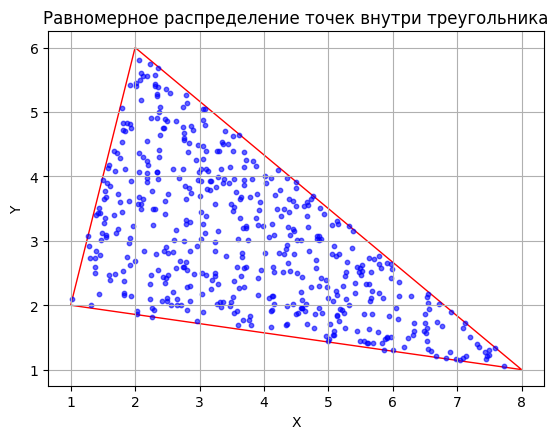

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Шаг 1: Определение вершин треугольника
vertices = np.array([[1, 2], [2, 6], [8, 1]])

# Шаг 2: Генерация равномерно распределенных точек внутри треугольника
def uniform_triangle_sample(vertices, num_points):
    # Генерация случайных чисел в единичном симплексе (треугольнике)
    r1 = np.random.uniform(0, 1, num_points)
    r2 = np.random.uniform(0, 1, num_points)
    # Преобразование координат
    s = np.sqrt(r1)
    t = r2
    # Преобразование в координаты треугольника
    x = (1 - s) * vertices[0, 0] + s * (1 - t) * vertices[1, 0] + s * t * vertices[2, 0]
    y = (1 - s) * vertices[0, 1] + s * (1 - t) * vertices[1, 1] + s * t * vertices[2, 1]
    return np.column_stack((x, y))

# Генерация 500 точек
num_points = 500
points = uniform_triangle_sample(vertices, num_points)

# Шаг 3: Визуализация
fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, edgecolor='r', facecolor='none')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10, color='b', alpha=0.6)
ax.set_aspect('equal')
plt.title('Равномерное распределение точек внутри треугольника')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

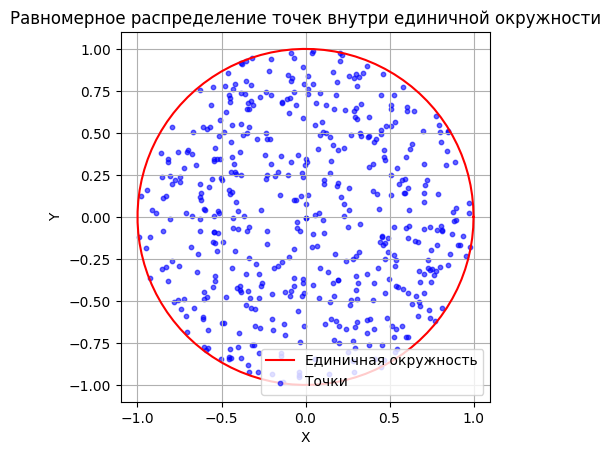

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Генерация равномерно распределенных точек внутри единичной окружности
def uniform_circle_sample(num_points):
    # Генерация случайных радиусов и углов
    r = np.sqrt(np.random.uniform(0, 1, num_points))  # Квадратный корень для равномерного распределения
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    # Преобразование в декартовы координаты
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Генерация 500 точек
num_points = 500
x, y = uniform_circle_sample(num_points)

# Шаг 2: Визуализация
fig, ax = plt.subplots()
# Отображение единичной окружности
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(t), np.sin(t), 'r-', label='Единичная окружность')
# Отображение сгенерированных точек
ax.scatter(x, y, s=10, color='b', alpha=0.6, label='Точки')
ax.set_aspect('equal')
plt.title('Равномерное распределение точек внутри единичной окружности')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Точки равномерно заполняют площадь круга, что подтверждает правильность метода.

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

<Figure size 1000x800 with 0 Axes>

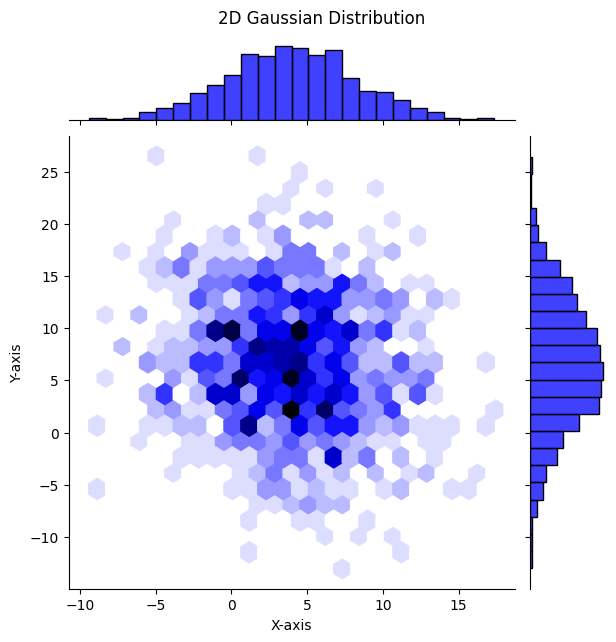

Выборочное среднее:
 [3.98900392 6.55480781]
Точное среднее:
 [4 7]
Выборочная ковариационная матрица:
 [[18.89464077 -3.37644123]
 [-3.37644123 38.24956956]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Модифицированный алгоритм Бокса-Мюллера
def box_muller_mod(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    # Исключаем тригонометрические функции
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Шаг 2: Генерация выборки из двумерного нормального распределения
def generate_2d_gaussian(n, mu, Sigma):
    # Генерация стандартных нормальных случайных величин
    z1, z2 = box_muller_mod(n)
    Z = np.vstack((z1, z2)).T
    # Разложение Холецкого для ковариационной матрицы
    L = np.linalg.cholesky(Sigma)
    # Преобразование к целевому распределению
    X = mu + Z @ L.T
    return X

# Параметры распределения
mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])

# Генерация выборки
n = 1000
samples = generate_2d_gaussian(n, mu, Sigma)

# Шаг 3: Построение двумерной гистограммы
plt.figure(figsize=(10, 8))
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='hex', color='blue')
plt.suptitle('2D Gaussian Distribution', y=1.03)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Шаг 4: Сравнение с точными значениями
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Выборочное среднее:\n", sample_mean)
print("Точное среднее:\n", mu)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", Sigma)